In [1]:
import pandas as pd

**Loading data **

In [2]:
data = pd.read_csv("/content/drive/MyDrive/Notes/OnlineRetailassoction1.csv",encoding='unicode_escape')

In [3]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


Invoice No -> order id


stock code -> product id





In [5]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

**Pre-Processing**

In [4]:
data['Description'] = data['Description'].str.strip()

In [5]:
data.InvoiceNo.isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
99994    False
99995    False
99996    False
99997    False
99998    False
Name: InvoiceNo, Length: 99999, dtype: bool

In [6]:
data.Description.isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
99994    False
99995    False
99996    False
99997    False
99998    False
Name: Description, Length: 99999, dtype: bool

In [7]:
sum(data.Description.isnull())

299

In [8]:
sum(data.InvoiceNo.isnull())

0

In [9]:
data.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [10]:
data.Country.value_counts()

United Kingdom          92358
Germany                  1680
France                   1456
EIRE                     1026
Spain                     560
Netherlands               492
Portugal                  285
Belgium                   263
Cyprus                    256
Australia                 243
Switzerland               237
Norway                    179
Italy                     169
Japan                     154
Sweden                     74
Poland                     61
Iceland                    60
Channel Islands            59
Hong Kong                  57
Singapore                  56
Lebanon                    45
Denmark                    40
Lithuania                  35
Israel                     32
Greece                     32
Austria                    30
United Arab Emirates       30
Finland                    28
Bahrain                     2
Name: Country, dtype: int64

In [11]:
data.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates'], dtype=object)

In [9]:
data.Description.value_counts()

WHITE HANGING HEART T-LIGHT HOLDER    543
REGENCY CAKESTAND 3 TIER              472
HEART OF WICKER SMALL                 385
JUMBO BAG RED RETROSPOT               350
SET OF 3 CAKE TINS PANTRY DESIGN      345
                                     ... 
YELLOW DRAGONFLY HELICOPTER             1
CANNABIS LEAF BEAD CURTAIN              1
GLASS BEAD HOOP EARRINGS AMETHYST       1
Dotcomgiftshop Gift Voucher £40.00      1
TOP SECRET PEN SET                      1
Name: Description, Length: 3044, dtype: int64

In [10]:
data.Description.unique()

array(['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN',
       'CREAM CUPID HEARTS COAT HANGER', ..., 'SCALLOP SHELL SOAP DISH',
       'PINK RIVIERA HANDBAG', 'TOP SECRET PEN SET'], dtype=object)

In [23]:
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Transaction done in Germany

In [24]:
basket_ge = data[data['Country'] =="Germany"]
basket_ge

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1109,536527,22809,SET OF 6 T-LIGHTS SANTA,6,01-12-2010 13:04,2.95,12662.0,Germany
1110,536527,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,6,01-12-2010 13:04,2.55,12662.0,Germany
1111,536527,84945,MULTI COLOUR SILVER T-LIGHT HOLDER,12,01-12-2010 13:04,0.85,12662.0,Germany
1112,536527,22242,5 HOOK HANGER MAGIC TOADSTOOL,12,01-12-2010 13:04,1.65,12662.0,Germany
1113,536527,22244,3 HOOK HANGER MAGIC GARDEN,12,01-12-2010 13:04,1.95,12662.0,Germany
...,...,...,...,...,...,...,...,...
96649,544573,22568,FELTCRAFT CUSHION OWL,8,21-02-2011 13:40,3.75,12621.0,Germany
96650,544573,20973,12 PENCIL SMALL TUBE WOODLAND,144,21-02-2011 13:40,0.65,12621.0,Germany
96651,544573,22583,PACK OF 6 HANDBAG GIFT BOXES,6,21-02-2011 13:40,2.55,12621.0,Germany
96652,544573,22585,PACK OF 6 BIRDY GIFT TAGS,12,21-02-2011 13:40,1.25,12621.0,Germany


In [26]:
basket_ge = basket_ge.groupby(["InvoiceNo","Description"])["Quantity"].sum()
basket_ge.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


InvoiceNo  Description                        
536527     3 HOOK HANGER MAGIC GARDEN             12
           5 HOOK HANGER MAGIC TOADSTOOL          12
           5 HOOK HANGER RED MAGIC TOADSTOOL      12
           ASSORTED COLOUR LIZARD SUCTION HOOK    24
           CHILDREN'S CIRCUS PARADE MUG           12
Name: Quantity, dtype: int64

In [27]:
basket_ge = basket_ge.unstack()
basket_ge.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Description,10 COLOUR SPACEBOY PEN,12 IVORY ROSE PEG PLACE SETTINGS,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE WOODLAND,12 RED ROSE PEG PLACE SETTINGS,20 DOLLY PEGS RETROSPOT,200 BENDY SKULL STRAWS,3 HOOK HANGER MAGIC GARDEN,...,WRAP ENGLISH ROSE,WRAP I LOVE LONDON,WRAP MONSTER FUN,WRAP PINK FAIRY CAKES,WRAP POPPIES DESIGN,WRAP RED APPLES,WRAP WEDDING DAY,"WRAP, BILLBOARD FONTS DESIGN",YELLOW COAT RACK PARIS FASHION,ZINC WILLIE WINKIE CANDLE STICK
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
536840,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
536861,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
536967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
536983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
basket_ge = basket_ge.fillna(0)
basket_ge.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Description,10 COLOUR SPACEBOY PEN,12 IVORY ROSE PEG PLACE SETTINGS,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE WOODLAND,12 RED ROSE PEG PLACE SETTINGS,20 DOLLY PEGS RETROSPOT,200 BENDY SKULL STRAWS,3 HOOK HANGER MAGIC GARDEN,...,WRAP ENGLISH ROSE,WRAP I LOVE LONDON,WRAP MONSTER FUN,WRAP PINK FAIRY CAKES,WRAP POPPIES DESIGN,WRAP RED APPLES,WRAP WEDDING DAY,"WRAP, BILLBOARD FONTS DESIGN",YELLOW COAT RACK PARIS FASHION,ZINC WILLIE WINKIE CANDLE STICK
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536840,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536861,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536967,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536983,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
# binaries the quantities
def reduce_to_binaries(x):
    if(x<= 0):
        return 0
    if(x>= 1):
        return 1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [30]:
basket_ge = basket_ge.applymap(reduce_to_binaries)
basket_ge

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Description,10 COLOUR SPACEBOY PEN,12 IVORY ROSE PEG PLACE SETTINGS,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE WOODLAND,12 RED ROSE PEG PLACE SETTINGS,20 DOLLY PEGS RETROSPOT,200 BENDY SKULL STRAWS,3 HOOK HANGER MAGIC GARDEN,...,WRAP ENGLISH ROSE,WRAP I LOVE LONDON,WRAP MONSTER FUN,WRAP PINK FAIRY CAKES,WRAP POPPIES DESIGN,WRAP RED APPLES,WRAP WEDDING DAY,"WRAP, BILLBOARD FONTS DESIGN",YELLOW COAT RACK PARIS FASHION,ZINC WILLIE WINKIE CANDLE STICK
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536527,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
536840,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536861,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536967,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536983,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C543445,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C543469,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C543661,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
basket_ge.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(111, 692)

### Apriori Algorithm

In [32]:
frequent_items = apriori(basket_ge, min_support = 0.03, use_colnames = True)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Support is a measure of how frequently an item or itemset appears in the dataset. It is calculated as the number of transactions containing the item(s) divided by the total number of transactions in the dataset. High support indicates that an item or itemset is common in the dataset, while low support indicates that it is rare.

Support = transaction containing items/total number of transation


In [33]:
frequent_items

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.036036,(12 PENCIL SMALL TUBE WOODLAND)
1,0.045045,(3 HOOK HANGER MAGIC GARDEN)
2,0.045045,(3 PIECE SPACEBOY COOKIE CUTTER SET)
3,0.045045,(5 HOOK HANGER MAGIC TOADSTOOL)
4,0.063063,(5 HOOK HANGER RED MAGIC TOADSTOOL)
...,...,...
379,0.036036,"(RED RETROSPOT PLATE, RED RETROSPOT CUP, POSTA..."
380,0.036036,"(RED RETROSPOT PLATE, RED RETROSPOT CUP, RED R..."
381,0.036036,"(RED RETROSPOT PLATE, RED RETROSPOT CUP, POSTA..."
382,0.036036,"(RED RETROSPOT PLATE, RED RETROSPOT CUP, POSTA..."


In [34]:
rules = association_rules(frequent_items, metric="lift", min_threshold=1)
rules.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(POSTAGE),(12 PENCIL SMALL TUBE WOODLAND),0.603604,0.036036,0.036036,0.059701,1.656716,0.014285,1.025168,1.000000
1,(12 PENCIL SMALL TUBE WOODLAND),(POSTAGE),0.036036,0.603604,0.036036,1.000000,1.656716,0.014285,inf,0.411215
2,(POSTAGE),(3 HOOK HANGER MAGIC GARDEN),0.603604,0.045045,0.036036,0.059701,1.325373,0.008847,1.015587,0.619318
3,(3 HOOK HANGER MAGIC GARDEN),(POSTAGE),0.045045,0.603604,0.036036,0.800000,1.325373,0.008847,1.981982,0.257075
4,(POSTAGE),(3 PIECE SPACEBOY COOKIE CUTTER SET),0.603604,0.045045,0.036036,0.059701,1.325373,0.008847,1.015587,0.619318


In [22]:
rules.sort_values(by = ["lift"],ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1347,(BLUE POLKADOT BOWL),"(RED RETROSPOT PLATE, RED RETROSPOT CUP, POSTA...",0.036036,0.036036,0.036036,1.000000,27.750000,0.034737,inf,1.000000
373,"(BLUE POLKADOT CUP, RED RETROSPOT BOWL)",(BLUE POLKADOT BOWL),0.036036,0.036036,0.036036,1.000000,27.750000,0.034737,inf,1.000000
1154,"(BLUE POLKADOT BOWL, RED RETROSPOT PLATE)","(BLUE POLKADOT CUP, POSTAGE, RED RETROSPOT BOWL)",0.036036,0.036036,0.036036,1.000000,27.750000,0.034737,inf,1.000000
391,"(POSTAGE, RED RETROSPOT BOWL)",(BLUE POLKADOT BOWL),0.036036,0.036036,0.036036,1.000000,27.750000,0.034737,inf,1.000000
388,(BLUE POLKADOT BOWL),"(BLUE POLKADOT CUP, RED RETROSPOT PLATE)",0.036036,0.036036,0.036036,1.000000,27.750000,0.034737,inf,1.000000
...,...,...,...,...,...,...,...,...,...,...
719,(POSTAGE),"(ROUND SNACK BOXES SET OF4 WOODLAND, REGENCY C...",0.603604,0.045045,0.036036,0.059701,1.325373,0.008847,1.015587,0.619318
155,(PACK OF 20 NAPKINS RED APPLES),(POSTAGE),0.045045,0.603604,0.036036,0.800000,1.325373,0.008847,1.981982,0.257075
658,(POSTAGE),"(RED RETROSPOT CUP, RED RETROSPOT BOWL)",0.603604,0.045045,0.036036,0.059701,1.325373,0.008847,1.015587,0.619318
237,(POSTAGE),(SET OF 3 CAKE TINS PANTRY DESIGN),0.603604,0.081081,0.063063,0.104478,1.288557,0.014122,1.026126,0.564935


In [35]:
import seaborn as sns
import matplotlib.pyplot as plt


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated

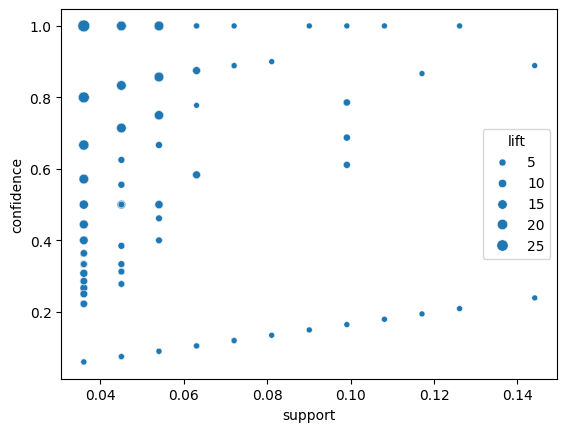

In [36]:
sns.scatterplot(x = "support", y = "confidence",
                size = "lift", data = rules)
plt.show()

## Fp_growth algorithm

In [44]:
from mlxtend.frequent_patterns import fpgrowth

fpgrowth(basket_ge, min_support=0.1)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.603604,(432)
1,0.108108,(275)
2,0.162162,(508)
3,0.135135,(482)
4,0.126126,(506)
5,0.108108,"(432, 275)"
6,0.144144,"(432, 508)"
7,0.117117,"(432, 482)"
8,0.126126,"(432, 506)"


In [45]:
fpgrowth(basket_ge, min_support=0.1, use_colnames=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.603604,(POSTAGE)
1,0.108108,(JAM MAKING SET PRINTED)
2,0.162162,(ROUND SNACK BOXES SET OF4 WOODLAND)
3,0.135135,(REGENCY CAKESTAND 3 TIER)
4,0.126126,(ROUND SNACK BOXES SET OF 4 FRUITS)
5,0.108108,"(JAM MAKING SET PRINTED, POSTAGE)"
6,0.144144,"(ROUND SNACK BOXES SET OF4 WOODLAND, POSTAGE)"
7,0.117117,"(REGENCY CAKESTAND 3 TIER, POSTAGE)"
8,0.126126,"(POSTAGE, ROUND SNACK BOXES SET OF 4 FRUITS)"
